In [64]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [65]:
# Load dataset
df = pd.read_csv('./wine+quality/winequality-red.csv', delimiter = ";")

In [66]:
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [67]:
X = df.loc[:, "volatile acidity":"alcohol"].values 
y = df['quality'].values 

In [88]:
# (b) splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.33, random_state=42)

In [89]:
normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))

In [90]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [91]:
# (c) train
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
w = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

In [92]:
np.shape(np.c_[np.ones((X_train.shape[0], 1)), X_train])

(1071, 11)

In [93]:
y_train_pred = X_train_b.dot(w)

/var/folders/mr/tc1nnrvs36dbsvrfyw2hmvs00000gn/T/ipykernel_26586/2196604413.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


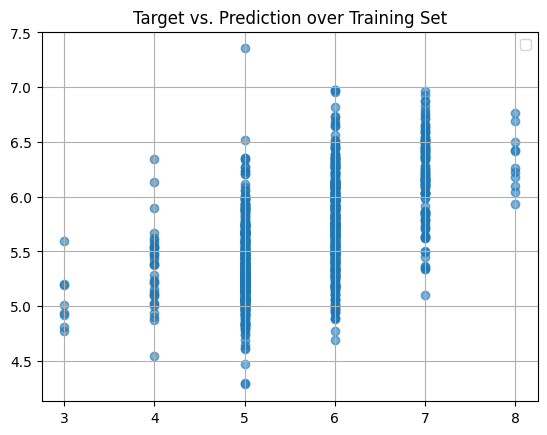

In [94]:
# (d)
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.title("Target vs. Prediction over Training Set") 
plt.legend() 
plt.grid(True) 
plt.show() 

The predicted values are generally higher than the expected values. There is a large variety in the points showing how inaccurate this model is. The spread is very large which is not what we want to see from an accurate model. There is a bias towards higher numbers.

In [75]:
from sklearn.metrics import root_mean_squared_error

In [76]:
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_test_pred = X_test_b.dot(w)

In [77]:
rmse_test = np.sqrt(root_mean_squared_error(y_test, y_test_pred))
rmse_train = np.sqrt(root_mean_squared_error(y_train, y_train_pred))

In [78]:
# (e)
print(rmse_test)
print(rmse_train)

0.37700309551494465
0.3591488169618828


In [79]:
# (f)
def gradientDescent(x, y, theta, m, alpha=0.0001, numIterations=500):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y

        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    
    return theta

In [80]:
weights_lms = gradientDescent(X_train, y_train, X_train[0], len(X_train))
weights_lms = np.append(weights_lms, np.array([1]), axis=0)
weights_lms = weights_lms.transpose()

In [81]:
rmse_test = 1000
rmse_train = 1000
for i in range(len(X_train)):
    weights_lms = gradientDescent(X_train, y_train, X_train[i], len(X_train))
    weights_lms = np.append(weights_lms, np.array([1]), axis=0)
    weights_lms = weights_lms.transpose()

    X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    y_train_pred = X_train_b.dot(weights_lms)

    X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    y_test_pred = X_test_b.dot(weights_lms)

    rmse_test = min(rmse_test, np.sqrt(root_mean_squared_error(y_test, y_test_pred)))
    rmse_train = min(rmse_test, np.sqrt(root_mean_squared_error(y_train, y_train_pred)))

In [82]:
# (g)
print(f"Test RMSE: {rmse_test}")
print(f"Train RMSE: {rmse_train}")

Test RMSE: 0.6835615921134437
Train RMSE: 0.6835615921134437
